In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import glob
import time

print("Packages Imported")

Packages Imported


# Description of functions

In [2]:
def call():
        
    print("This helps to record functions present in current python notebook\n")
    
    # load the file_loader function
    print("file_loader: loads a file and returns it as a dataframe")
    print("params: ")
    print("direc-- name of directory of file")
    print("name-- name of the file to be loaded (with extension)\n")
    
    # check shape of array or dataframe
    print("call_shape: used to get shape of particular array or dataframe")
    print("params: ")
    print("datafr-- any array or dataframe\n")
    
    # load dataframes into csv files
    print("load_data: loads a dataframe as a csv")
    print("params: ")
    print("pdx-- the dataframe to be stored")
    print("direc-- the name of the directory")
    print("filename-- the name of the csv file\n")
    
    # sample the data from 62.5hz to 10hz
    print("sample_rate: resample the dataset")
    print("params: ")
    print("pdx-- the dataframe to be resampled")
    print("interval-- timestamps to skip")

# 1. Load the required datasets

In [42]:
### set up a function to auto download many files...

# function to  load file names
def file_names(direc, ext):
    
    all_names = []
    os.chdir(direc)
    
    f_ext = "*." + ext
    for files in glob.glob(f_ext):
        all_names.append(files)
    
    os.chdir('..')
    return all_names



# function to split file names into 3 distractions
def split_names(names):
    hf, mu, te = [], [], []
    
    for name in names:
        
        if "hf" in name or "HF" in name:
            hf.append(name)
            
        if "us" in name:
            mu.append(name)
            
        if "ex" in name:
            te.append(name)
            
    return hf, mu, te



# funciton to load files
def file_loader(direc, name):
    # loads only xlsx?
    # should be called expecting a return value
    # pass file name with extension
    
    os.chdir(direc)
    print(os.getcwd())
    pdxx = pd.read_excel(name)
    print("File ", name, " has been loaded")
    print("Testing if the file is loaded successfully...")
    print("Shape of: ", name, " --- ", pdxx.shape)
    os.chdir('..')
    return pdxx



# function to load all files
def load_all(direc, name_set):
    f_data = []
    
    for name in name_set:
        data = file_loader(direc, name)
        
        # remove the SI units and change datatype
        data_mod = data.iloc[1:, :7]
        
        float_data = data_mod.astype('float64')
        
        f_data.append(float_data)   
        
    return f_data



# function to find shape of dataframe or array
def callShape(datafr):
    #print("Initial shape of hf: ", hf1.shape)
    print("Current shape: ", datafr.shape)

In [37]:
# load all the file names
full_names = file_names("og_files", "xlsx")

# split all the names into the 3 types of distractions
s_hf, s_mu, s_te = split_names(full_names)

len(s_hf), len(s_mu), len(s_te)

(40, 40, 40)

In [38]:
full_names

['01_HF.xlsx',
 '01_music.xlsx',
 '01_Text.xlsx',
 '02_HF.xlsx',
 '02_Music.xlsx',
 '02_Text.xlsx',
 '03_HF.xlsx',
 '03_music.xlsx',
 '03_Text.xlsx',
 '04_hf.xlsx',
 '04_music.xlsx',
 '04_text.xlsx',
 '05_hf.xlsx',
 '05_music.xlsx',
 '05_text.xlsx',
 '06_HF.xlsx',
 '06_music.xlsx',
 '06_text.xlsx',
 '13_hf.xlsx',
 '13_music.xlsx',
 '13_text.xlsx',
 '14_hf.xlsx',
 '14_music.xlsx',
 '14_text.xlsx',
 '15_hf.xlsx',
 '15_music.xlsx',
 '15_text.xlsx',
 '16_hf.xlsx',
 '16_music.xlsx',
 '16_text.xlsx',
 '17_hf.xlsx',
 '17_music.xlsx',
 '17_text.xlsx',
 '18_hf.xlsx',
 '18_music.xlsx',
 '18_text.xlsx',
 '25_HF.xlsx',
 '25_music.xlsx',
 '25_text.xlsx',
 '26_hf.xlsx',
 '26_music.xlsx',
 '26_text.xlsx',
 '27_hf.xlsx',
 '27_music.xlsx',
 '27_text.xlsx',
 '28_HF.xlsx',
 '28_music.xlsx',
 '28_text.xlsx',
 '29_HF.xlsx',
 '29_music.xlsx',
 '29_text.xlsx',
 '30_HF.xlsx',
 '30_music.xlsx',
 '30_text.xlsx',
 '37_HF.xlsx',
 '37_music.xlsx',
 '37_text.xlsx',
 '38_HF.xlsx',
 '38_music.xlsx',
 '38_text.xlsx',


In [43]:
# lists to store updated datasets
l_hf = load_all("og_files", s_hf)
l_mu = load_all("og_files", s_mu)
l_te = load_all("og_files", s_te)

print(os.getcwd())

C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  01_HF.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  01_HF.xlsx  ---  (75884, 11)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  02_HF.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  02_HF.xlsx  ---  (67823, 12)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  03_HF.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  03_HF.xlsx  ---  (73544, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  04_hf.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  04_hf.xlsx  ---  (73626, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  05_hf.xlsx  has bee

File  68_HF.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  68_HF.xlsx  ---  (68292, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  75_HF.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  75_HF.xlsx  ---  (71104, 16)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  76_HF.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  76_HF.xlsx  ---  (73331, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  01_music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  01_music.xlsx  ---  (75884, 11)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  02_Music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  02_Music.xlsx  ---  (669

File  65_music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  65_music.xlsx  ---  (75524, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  66_music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  66_music.xlsx  ---  (79840, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  67_music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  67_music.xlsx  ---  (72935, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  68_music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  68_music.xlsx  ---  (69845, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  75_music.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  75_mus

File  56_text.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  56_text.xlsx  ---  (72689, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  63_text.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  63_text.xlsx  ---  (71607, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  64_text.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  64_text.xlsx  ---  (68099, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  65_text.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  65_text.xlsx  ---  (77827, 14)
C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5\og_files
File  66_text.xlsx  has been loaded
Testing if the file is loaded successfully...
Shape of:  66_text.xlsx  -

# Make them dictionaries...

In [29]:
def lookup(cur_dict):
    
    cur_k = list(cur_dict.keys())
    cur_v = list(cur_dict.values())
    
    for i in range(len(cur_k)):
        print(cur_k[i], " -----> ", cur_v[i].shape)
        
    return cur_k, cur_v


def join_dict(cur_k, cur_v):
    
    cur_dict = dict()
    
    for i in range(len(cur_k)):
        cur_dict[cur_k[i]] = cur_v[i]
        
    return cur_dict

In [46]:
# sep distraction dictionaries
hfd = join_dict(s_hf, l_hf)
mud = join_dict(s_mu, l_mu)
ted = join_dict(s_te, l_te)

len(list(hfd.keys()))

40

# 2. Getting 1/10th sampled data

In [48]:
# NOTE: dataframe is only set when iloc/loc contains both ':' marks and values before and after ':'

# function to select at a particular sample rate
def sample_rate(pdx, interval=7): 

    # setting the starting sample in the dataframe
    pdx_sub = pd.DataFrame(pdx.iloc[:1, :])
    
    # taking out every values from the dataframe to get an interval of 1/10th of a sec
    for cnt in range(1, len(pdx)-1):
        # 7 is chosen to maintain time interval to 1/10th sec
        if cnt % interval == 0:
            pdx_app = pd.DataFrame(pdx.iloc[cnt-1:cnt, :])
            pdx_sub = pdx_sub.append(pdx_app, ignore_index=True)
            
    callShape(pdx_sub) # initial subset shape
    
    # remove the initially added row to keep balance
    pdx_sub_cutoff = pdx_sub.iloc[1:, :]
    #print("Sampling at interval of ", interval, " completed.")
    
    #print(pdx_sub_cutoff.head(5))
    return pdx_sub_cutoff

# collect the sampled data
def sample_after(pdx_dict):
    
    pdx_k, pdx_v = lookup(pdx_dict)
    
    spd_v = []
    
    for i in range(len(pdx_k)):
        spd = sample_rate(pdx_v[i])
        spd_v.append(spd)
        
    print(len(pdx_k), len(spd_v))
    fin_dict = join_dict(pdx_k, spd_v)
    return fin_dict

In [49]:
# sampling at 1/10th of a sec
hfs = sample_after(hfd)
mus = sample_after(mud)
tes = sample_after(ted)

01_HF.xlsx  ----->  (75883, 7)
02_HF.xlsx  ----->  (67822, 7)
03_HF.xlsx  ----->  (73543, 7)
04_hf.xlsx  ----->  (73625, 7)
05_hf.xlsx  ----->  (73451, 7)
06_HF.xlsx  ----->  (77001, 7)
13_hf.xlsx  ----->  (70408, 7)
14_hf.xlsx  ----->  (65321, 7)
15_hf.xlsx  ----->  (66171, 7)
16_hf.xlsx  ----->  (65366, 7)
17_hf.xlsx  ----->  (75771, 7)
18_hf.xlsx  ----->  (76448, 7)
25_HF.xlsx  ----->  (70862, 7)
26_hf.xlsx  ----->  (69271, 7)
27_hf.xlsx  ----->  (65555, 7)
28_HF.xlsx  ----->  (73587, 7)
29_HF.xlsx  ----->  (70659, 7)
30_HF.xlsx  ----->  (74033, 7)
37_HF.xlsx  ----->  (67514, 7)
38_HF.xlsx  ----->  (73285, 7)
39_HF.xlsx  ----->  (67884, 7)
40_HF.xlsx  ----->  (70187, 7)
41_HF.xlsx  ----->  (71218, 7)
42_HF.xlsx  ----->  (74516, 7)
43_HF.xlsx  ----->  (73860, 7)
44_HF.xlsx  ----->  (73868, 7)
51_HF.xlsx  ----->  (70430, 7)
52_HF.xlsx  ----->  (73638, 7)
53_HF.xlsx  ----->  (65456, 7)
54_HF.xlsx  ----->  (70060, 7)
55_HF.xlsx  ----->  (71297, 7)
56_HF.xlsx  ----->  (76232, 7)
63_HF.xl

# 3. Arranging the datasets to be stored

In [54]:
hfs['01_HF.xlsx'].columns = hfs['02_HF.xlsx'].columns.values

In [62]:
# setup all the hf only data
hfk, hfv = lookup(hfs)
all_hf = pd.concat(hfv)

# setup all the mu only data
muk, muv = lookup(mus)
all_mu = pd.concat(muv)

# setup all the te only data
tek, tev = lookup(tes)
all_te = pd.concat(tev)

01_HF.xlsx  ----->  (10840, 7)
02_HF.xlsx  ----->  (9688, 7)
03_HF.xlsx  ----->  (10505, 7)
04_hf.xlsx  ----->  (10517, 7)
05_hf.xlsx  ----->  (10492, 7)
06_HF.xlsx  ----->  (10999, 7)
13_hf.xlsx  ----->  (10058, 7)
14_hf.xlsx  ----->  (9331, 7)
15_hf.xlsx  ----->  (9452, 7)
16_hf.xlsx  ----->  (9337, 7)
17_hf.xlsx  ----->  (10824, 7)
18_hf.xlsx  ----->  (10920, 7)
25_HF.xlsx  ----->  (10122, 7)
26_hf.xlsx  ----->  (9895, 7)
27_hf.xlsx  ----->  (9364, 7)
28_HF.xlsx  ----->  (10512, 7)
29_HF.xlsx  ----->  (10093, 7)
30_HF.xlsx  ----->  (10575, 7)
37_HF.xlsx  ----->  (9644, 7)
38_HF.xlsx  ----->  (10469, 7)
39_HF.xlsx  ----->  (9697, 7)
40_HF.xlsx  ----->  (10026, 7)
41_HF.xlsx  ----->  (10173, 7)
42_HF.xlsx  ----->  (10644, 7)
43_HF.xlsx  ----->  (10551, 7)
44_HF.xlsx  ----->  (10552, 7)
51_HF.xlsx  ----->  (10061, 7)
52_HF.xlsx  ----->  (10519, 7)
53_HF.xlsx  ----->  (9350, 7)
54_HF.xlsx  ----->  (10008, 7)
55_HF.xlsx  ----->  (10185, 7)
56_HF.xlsx  ----->  (10890, 7)
63_HF.xlsx  -----

In [63]:
all_hf.shape, all_mu.shape, all_te.shape

((406241, 7), (428231, 7), (433037, 7))

In [64]:
# full data set

# full keys
full_k = []
full_k.extend(hfk)
full_k.extend(muk)
full_k.extend(tek)

# full values
full_v = []
full_v.extend(hfv)
full_v.extend(muv)
full_v.extend(tev)

all_v = pd.concat(full_v)

all_v.shape

(1267509, 7)

# 4. Files to be stored

In [65]:
'''
full combo

individual distractions
'''

'\nfull combo\n\nindividual distractions\n'

In [66]:
direc = 'pre_files'
ext = '.csv'

# function to store the dataframe
def store_data(pdx, filename):
    '''
    # the dataframe to be stored: pdx
    # file to be stored and loaded from: filename
    '''
    
    os.chdir(direc)
    
    # write to csv file
    pdx.to_csv(filename, sep=',', encoding='utf-8')
    
    print("File ", filename, " is loaded with the data from the dataframe...")\
    
    os.chdir('..')
    
    return

In [67]:
#os.chdir('..')
print(os.getcwd())

store_data(all_v, 'al.csv')

C:\Users\sunny\Desktop\workspace0\neural_nets\research_S19\MTO_data_copy\phase_dt\phase_5
File  al.csv  is loaded with the data from the dataframe...


In [68]:
store_data(all_hf, 'hf.csv')
store_data(all_mu, 'mu.csv')
store_data(all_te, 'te.csv')

File  hf.csv  is loaded with the data from the dataframe...
File  mu.csv  is loaded with the data from the dataframe...
File  te.csv  is loaded with the data from the dataframe...


# (Side) 5. Look into Demographics...

In [29]:
demo = pd.read_excel('demo.xlsx')

In [30]:
dual = pd.DataFrame(demo.iloc[:1, :])

for i in range(demo.shape[0]):
    if demo.iloc[i, 1] == 2:
        app = pd.DataFrame(demo.iloc[i:i+1, :])
        dual = dual.append(app, ignore_index=True)
        
fi = dual.iloc[1:, :]

In [31]:
li_lab = fi.columns.values

for i in range(len(li_lab)):
    print(i, "---")
    print(fi[li_lab[i]].value_counts())
    print("*******************************************")
    print("\n")

0 ---
62    1
61    1
21    1
20    1
19    1
74    1
72    1
80    1
77    1
78    1
73    1
12    1
11    1
10    1
9     1
8     1
7     1
70    1
69    1
22    1
23    1
24    1
48    1
60    1
59    1
58    1
57    1
71    1
50    1
49    1
47    1
31    1
46    1
45    1
36    1
35    1
34    1
33    1
32    1
79    1
Name: PNUM, dtype: int64
*******************************************


1 ---
2    40
Name: Condition, dtype: int64
*******************************************


2 ---
2    31
1     9
Name: Intake_Gender, dtype: int64
*******************************************


3 ---
18    26
20     5
19     4
22     2
21     2
17     1
Name: Intake_Age, dtype: int64
*******************************************


4 ---
0.0    29
1.0    11
Name: Intake_ProbEyes, dtype: int64
*******************************************


5 ---
Near-sightedness            3
near sighted                2
Myopia (Nearsightedness)    1
slight stig.                1
slight distance problems    1
          

# Create labels to window them as well..

In [ ]:
# label of brake 2 classes
# label of driver 4 classes
# label of distraction 3 classes
# label of DISTANCE !!
# label of section 5 classes
# 2D - label of gender 2 classes
# 34AI - label of age of starting to drive 2 classes
# 36AK - label of liscense level 2 classes
# 49AX - label of whether driving assistance is needed 2 classes
# 51AZ - label of whether driving is a challenge 2 classes
# 56BC - label of whether person was distracted (d1) 9 classes
# 59BF - label of whether person is distracted (d2) 8 classes
# 64BK - label of whether person is distracted (d3) 9 classes
# 66+++???

# 3C - label of age ? 6 classes
# 6G - label of ear problem ? 2 classes
# 11L - label of hours sleep ? 10 classes
# 12M - label of tired levels ? 7 classes
# 14O- label distract focus levels ? 8 classes

# specific music section
# 18S - label years of music distraction ? 13 classes
# 21V - label years of music while walking ?? 6 classes
# 22W - label years of music while driving ?? 6 classes

# specific phone calls section
# 27AB - label phone while walking ?? 6 classes
# 28AC - label phone while driving ?? 5 classes

# specific texting section
# 29AD - label text while walking ?? 5 classes
# 30AE - label text while driving ?? 5 classes
# 31AF - label car system input ?? 2 classes

yes


,Time,Brake pressure,Tangential speed,Tangent AccelerationX,Tangent AccelerationY,Tangent AccelerationZ,Lane gap,ExportChannel/1,ExportChannel/7,ExportChannel/8
1,0.002,0.0,0.006248,1.208690,-0.016819,-0.942067,5.150000e-07,999999.0,99000.0,0.0
2,0.018,0.0,0.119410,1.549750,0.016033,-0.797061,2.370000e-06,999999.0,99000.0,0.0
3,0.034,0.0,0.206373,1.025010,0.019695,-0.825751,5.250000e-06,999999.0,99000.0,0.0
4,0.050,0.0,0.271870,0.593853,-0.007502,-0.915472,8.000000e-06,999999.0,99000.0,0.0
5,0.066,0.0,0.321858,0.313963,0.017885,-0.806196,9.840000e-06,999999.0,99000.0,0.0
6,0.082,0.0,0.361514,0.070022,0.024870,-0.839599,1.070000e-05,999999.0,99000.0,0.0
7,0.098,0.0,0.392668,-0.079845,0.003401,-0.629291,1.090000e-05,999999.0,99000.0,0.0
8,0.114,0.0,0.415506,-0.268113,-0.014553,-0.645832,1.060000e-05,999999.0,99000.0,0.0
9,0.130,0.0,0.430422,-0.376774,0.019797,-0.521210,1.000000e-05,999999.0,99000.0,0.0
10,0.146,0.0,0.437022,-0.443272,-0.000064,-0.294845,9.000000e-06,999999.0,99000.0,0.0


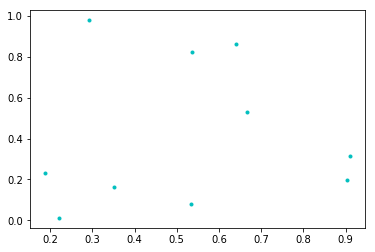

In [41]:
'''test stuff here'''

# Load data description and correlations

'''# description lists
des_hf = []
des_mus = []
des_tex = []

# correlation lists
corr_hf = []
corr_mus = []
corr_tex = []

for i in range(num-1):
    
    # loading individual description lists
    des_hf.append(l_hf[i].describe())
    des_mus.append(l_mus[i].describe())
    des_tex.append(l_tex[i].describe())
    
    # loading individual correlation matrices
    corr_hf.append(l_hf[i].corr())
    corr_mus.append(l_mus[i].corr())
    corr_tex.append(l_tex[i].corr())
    
    print("In progress...")
print("Done!")

corr_tex[3].columns.values'''


# Understanding the correlation matrix...

'''
# increasingly directly related lists of hf, mus & tex
dir_hf = []
dir_mus = []
dir_tex = []

# decreasingly indirectly related lists of hf, mus & tex
undir_hf = []
undir_mus = []
undir_tex = []

# function to return lists of directly and indirectly related features
def col_rel(pdx): # CORRELATION DIRECT AND INDIRECT
    # pdx: an individual dataframe
    direct = []
    undir = []
    
    # get the list of column names
    col = pdx.columns.values
    # run through combinations of column names
    for c in col:
        for o in col:
            t = pdx[c][o]
            
            # tests direct relation
            if t > 0.1 and t < 1.0:
                tup = (c, o, t)
                direct.append(tup)
                
            # tests indirect relation
            if t < -0.1:
                tup1 = (c, o, t)
                undir.append(tup1)
                
    return direct, undir

# lists to store relationship counts
plus_hf = []
plus_mus = []
plus_tex = []

# function to get the counts of relationship
def corr_rel(pdx, direct, undir): # CORRELATION COUNT OF FEATURE RELATIONS
    # pdx: a single dataframe
    # direct: its respective direct relationships
    # undir: its respective indirect relationships
    
    # get the list of columns
    colist = pdx.columns.values
    
    lis = []
    
    for c in colist:
        # reset the counter
        counter = 0
        
        # load both direct and undirect at a time
        for tup, tup1 in zip(direct, undir):
            #print(tup, tup1)
            
            # case of any one equal---> (col1, col2, value), (coln, colm, value)
            if tup[0] == c or tup1[0] == c:
                counter = counter + 1

            # to pevent loss of count when both equal---> (col1, col2, value), (col1, colm, value)
            if tup[0] == c and tup1[0] == c:
                counter = counter + 1
        
        # set the name and count        
        ntup = (c, counter)
        lis.append(ntup)
        
    return lis
    

# get respective direct and indirect relations and counts....
for i in range(0, num-1):
    
    # ... for hf 
    #print('hf norm')
    d1, u1 = col_rel(corr_hf[i])
    dir_hf.append(d1)
    undir_hf.append(u1)
    
    # counts
    #print('hf count')
    y1 = corr_rel(corr_hf[i], d1, u1)
    plus_hf.append(y1)
    
    # ... for mus
    #print('mus norm')
    d2, u2 = col_rel(corr_mus[i])
    dir_mus.append(d2)
    undir_mus.append(u2)
    
    # counts
    #print('mus count')
    y2 = corr_rel(corr_mus[i], d2, u2)
    plus_mus.append(y2)
    
    # ... for tex
    #print('tex norm')
    d3, u3 = col_rel(corr_tex[i])
    dir_tex.append(d3)
    undir_tex.append(u3)
    
    # counts
    #print('tex count')
    y3 = corr_rel(corr_tex[i], d3, u3)
    plus_tex.append(y3)
    
for i in range(num-1):
    print("HF data", i)
    print(plus_hf[i])
    print("Mus data", i)
    print(plus_mus[i])
    print("Tex data", i)
    print(plus_tex[i])'''


# understanding good and bad correlations

'''
cutout = []

for i in range(num-1):
    for p1, p2, p3 in zip(plus_hf[i], plus_mus[i], plus_tex[i]):
        if p1[1] < 2:
            print("cut out ", p1[0], ' from hf', i, ' because its count is only ', p1[1])
            name = 'hf-' + str(i)
            tup = (p1, name)
            cutout.append(tup)
            
        if p2[1] < 2:
            print("cut out ", p2[0], ' from mus', i, ' because its count is only ', p2[1])
            name = 'mus-' + str(i)
            tup = (p2, name)
            cutout.append(tup)
            
        if p3[1] < 2:
            print("cut out ", p3[0], ' from tex', i, ' because its count is only ', p3[1])
            name = 'tex-' + str(i)
            tup = (p3, name)
            cutout.append(tup)
plus_hf[0][0][0]
'''


# random seperate sets of hf/mus/tex

'''
def rand_one(lis): # 10-segments x 4-participants x 100-length = 4000 in single distraction
    # lis: list of respective datasets
    
    # set batch size
    window = 100
    
    length = []
    for dt in lis:
        length.append(dt.shape[0]-window-1)
        
    mini = min(length)
    
    
    # get batches as a list
    combo_list = []
    
    # aiming to get 10 sets of each participant
    for x in range(10):
        
        # select random start point, maintain it for every participant
        choice = np.random.randint(0, mini)
            
        # run over each dataset in the list
        for i, dt in enumerate(lis):
            
            print('participant-', i, 'from ', choice, ' to ', choice+window)
            combo = dt.iloc[choice:choice+window, :]
            combo_list.append(combo)
    
    print()
    print("Random Select Complete!!")
    print("length: ", len(combo_list))
    return combo_list



# dataset 3: random collection of seperated hf, mus, tex data (DATAFRAME)
# random all data into 1 each 
batch_14_hf = pd.concat(rand_one(lab_merge_hf))
batch_14_mus = pd.concat(rand_one(lab_merge_mus))
batch_14_tex = pd.concat(rand_one(lab_merge_tex))'''


# random combined sets of hf/mus/tex

'''
def rand_combo(hf0, mus0, tex0): # 3-datasets x 10-segments x 30-length = 900 in combination distractions
    # 3 lists for hf, mus and tex
    
    # initialize list to be extracted
    combo_list = []
     
    window = 30
    
    for x in range(10):

        # select random start point
        ch1 = np.random.randint(0, hf0.shape[0]-window-1)
        ch2 = np.random.randint(0, mus0.shape[0]-window-1)
        ch3 = np.random.randint(0, tex0.shape[0]-window-1)
        
        combo1 = hf0.iloc[ch1:ch1+window, :]
        combo2 = mus0.iloc[ch2:ch2+window, :]
        combo3 = tex0.iloc[ch3:ch3+window, :]
        
        combo_list.append(combo1)
        combo_list.append(combo2)
        combo_list.append(combo3)
    
    print("New Shape : ", len(combo_list))
    return pd.concat(combo_list)



# dataset 4: hf/mus/tex of individual participant (LIST OF DATAFRAMES)
random_participant = []

for i in range(num-1):
    cx = participant[i]
    combo_seperated = rand_combo(lab_merge_hf[i], lab_merge_mus[i], lab_merge_tex[i])
    random_participant.append(combo_seperated)
    print("Shape : ", combo_seperated.shape)
    
random_14_participant = pd.concat(random_participant) # DATAFRAME
random_14_participant.shape'''


# creating a mixed random function

'''
def mix_rand(li1, li2, li3):
    # li1 is hf combo
    # li2 is mus combo
    # li3 is tex combo
    
    window = 30
    min_len = []
    for i in range(len(li1)):
        min_len.append(min(li1[i].shape[0], li2[i].shape[0], li3[i].shape[0]))
    minim = min(min_len)-window-1
    
    # collection of mixed random to be returned
    combo_list = []
    
    # get 10 sets of each
    for x in range(10):
        
        # select random start point
        ch = np.random.randint(0, minim)
        
        # get each participant data of 3 distractions
        for l1, l2, l3 in zip(li1, li2, li3):

            combo1 = l1.iloc[ch:ch+window, :]
            combo2 = l2.iloc[ch:ch+window, :]
            combo3 = l3.iloc[ch:ch+window, :]

            combo_list.append(combo1)
            combo_list.append(combo2)
            combo_list.append(combo3)
        
        print("Done: ", x, ch, ch+window)    
    return pd.concat(combo_list)

mix_rand_14_participants = mix_rand(lab_merge_hf, lab_merge_mus, lab_merge_tex)


print("Shape of mix", mix_rand_14_participants.shape)'''



x = np.random.rand(10)
y = np.random.rand(10)

plt.plot(x, y, 'c.')


i = True

if i:
    print('yes')
    
else:
    print('no')
    
    
np.random.randint(5,15)

a = 0

np.repeat(a, 10)

l_hf[0].iloc[:10, :]